# 13. Choice Modeling

* 싸이지먼트 / 소비자On : 파트2 - R마케팅[1]
* 김무성

# Contents

* 13.1 Choice-Based Conjoint Analysis Surveys
* 13.2 Simulating Choice Data
* 13.3 Fitting a Choice Model
* 13.4 Adding Consumer Heterogeneity to Choice Models
* 13.5 Hierarchical Bayes Choice Models
* 13.6 Design of Choice-Based Conjoint Surveys
* 13.7 Learning More
* 13.8 Key Points

Much of the data we observe in marketing describes customers purchasing products.

In this chapter we discuss how to analyze customers’ product choices within a category to understand how features and price affect which product a customer will choose.

#### For example, 
* if a customer comes into the store and 
    - purchases a 
        - 30 oz. jar 
        - of Hellman’s brand canola mayonnaise 
        - for $3.98, 
    - we can conceptualize this as the customer choosing that particular type of mayonnaise among all the other mayonnaise available at that store.
* This data on customers’ choices 
    - can be analyzed to determine 
        - which features of a product 
            - (e.g., package size, brand, or flavor) 
            - are most attractive to customers and 
            - how they trade off desirable features 
            - against price.

#### multinomial logit model

* In this chapter, we focus on the multinomial logit model, the most fre- quently used choice model in marketing.

#### choice-based conjoint analysis

* While choice models are often used to analyze retail purchase data, there are some settings where it is more difficult to collect data on customers’ product choices.
*  In these settings, marketers turn to choice-based conjoint analysis, which is a survey method where customers are asked to make choices among products with varying features and prices. 
* We analyze these survey choices using the multinomial logit model just as we might analyze real purchases.

In this chapter, our example focuses on choice-based conjoint analysis, but the methods we describe could be applied to retail purchase data as well.

# 13.1 Choice-Based Conjoint Analysis Surveys

Conjoint surveys give marketers information about how customers choose products by asking respondents to answer survey questions like the one shown in Fig. 13.1.

In this question, respondents are asked to choose from three product profiles, each with a specific passenger capacity, cargo capacity, engine type, and price.

<img src="figures/cap13.1.png" width=600 />

In the next section, we generate hypothetical data from a conjoint survey where each respondent answers 15 questions like the one in Fig. 13.1. 

Each question offers the respondent three alternatives to choose from, so each respondent sees a total of 15 × 3 = 45 product profiles. 

Conjoint surveys often include more attributes, more questions, and more alternatives in each question; a typical study might have 5–10 attributes and include 10–20 questions for each respondent.

#### data download

In [1]:
# 아래 코드들은 파이썬 커널로 할 것
!ls *

13_Choice_Modeling.ipynb RBetas.csv               RLog.txt                 restart.txt

data:
rintro-chapter13conjoint.csv

figures:
cap13.1.png  cap13.2.png  cap13.3.png  cap13.4.png  cap13.4.tiff


In [2]:
!wget http://goo.gl/5xQObB -O data/rintro-chapter13conjoint.csv

--2015-12-18 19:38:38--  http://goo.gl/5xQObB
Resolving goo.gl... 59.18.34.162, 59.18.34.167, 59.18.34.168, ...
Connecting to goo.gl|59.18.34.162|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://r-marketing.r-forge.r-project.org/data/rintro-chapter13conjoint.csv [following]
--2015-12-18 19:38:40--  http://r-marketing.r-forge.r-project.org/data/rintro-chapter13conjoint.csv
Resolving r-marketing.r-forge.r-project.org... 137.208.57.38
Connecting to r-marketing.r-forge.r-project.org|137.208.57.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328476 (321K) [text/csv]
Saving to: 'data/rintro-chapter13conjoint.csv'

data/rintro-chapter 100%[=====================>] 320.78K   158KB/s   in 2.0s   

2015-12-18 19:38:44 (158 KB/s) - 'data/rintro-chapter13conjoint.csv' saved [328476/328476]



In [3]:
!ls *

13_Choice_Modeling.ipynb RBetas.csv               RLog.txt                 restart.txt

data:
rintro-chapter13conjoint.csv

figures:
cap13.1.png  cap13.2.png  cap13.3.png  cap13.4.png  cap13.4.tiff


In [21]:
# 여기서부터 다시 R 커널로

# 본문은 웹에서 바로 자료를 가져오지만, 
#cbc.df <- read.csv("http://goo.gl/5xQObB", colClasses = c(seat = "factor", price = "factor"))

# 우리는 다운로드 받은 파일을 로딩하겠음.
cbc.df <- read.csv("data/rintro-chapter13conjoint.csv", 
                   colClasses = c(seat = "factor", price = "factor"))

In [40]:
head(cbc.df)

resp.id ques alt carpool seat cargo  eng price choice
1       1    1   1     yes    6   2ft  gas    35      0
2       1    1   2     yes    8   3ft  hyb    30      0
3       1    1   3     yes    6   3ft  gas    30      1
4       1    2   1     yes    6   2ft  gas    30      0
5       1    2   2     yes    7   3ft  gas    35      1
6       1    2   3     yes    6   2ft elec    35      0

In [41]:
str(cbc.df)

'data.frame':	9000 obs. of  9 variables:
 $ resp.id: int  1 1 1 1 1 1 1 1 1 1 ...
 $ ques   : int  1 1 1 2 2 2 3 3 3 4 ...
 $ alt    : int  1 2 3 1 2 3 1 2 3 1 ...
 $ carpool: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ seat   : Factor w/ 3 levels "6","7","8": 1 3 1 1 2 1 3 2 3 2 ...
 $ cargo  : Factor w/ 2 levels "2ft","3ft": 1 2 2 1 2 1 2 2 1 2 ...
 $ eng    : Factor w/ 3 levels "elec","gas","hyb": 2 3 2 2 2 1 2 1 1 1 ...
 $ price  : Factor w/ 3 levels "30","35","40": 2 1 1 1 2 2 2 1 3 3 ...
 $ choice : int  0 0 1 0 1 0 1 0 0 1 ...


In [42]:
summary(cbc.df)

    resp.id            ques         alt    carpool    seat     cargo     
 Min.   :  1.00   Min.   : 1   Min.   :1   no :6345   6:3024   2ft:4501  
 1st Qu.: 50.75   1st Qu.: 4   1st Qu.:1   yes:2655   7:2993   3ft:4499  
 Median :100.50   Median : 8   Median :2              8:2983             
 Mean   :100.50   Mean   : 8   Mean   :2                                 
 3rd Qu.:150.25   3rd Qu.:12   3rd Qu.:3                                 
 Max.   :200.00   Max.   :15   Max.   :3                                 
   eng       price         choice      
 elec:3010   30:2998   Min.   :0.0000  
 gas :3005   35:2997   1st Qu.:0.0000  
 hyb :2985   40:3005   Median :0.0000  
                       Mean   :0.3333  
                       3rd Qu.:1.0000  
                       Max.   :1.0000  

# 13.2 Simulating Choice Data

In [3]:
attrib <- list(seat = c("6", "7", "8"), 
               cargo = c("2ft", "3ft"),
               eng = c("gas", "hyb", "elec"),
               price = c("30", "35", "40"))

In [4]:
coef.names <- NULL
for (a in seq_along(attrib)) {
    coef.names <- c(coef.names,
                    paste(names(attrib)[a], attrib[[a]][-1], sep="")) 
}
coef.names

[1] "seat7"    "seat8"    "cargo3ft" "enghyb"   "engelec"  "price35"  "price40"

In [5]:
mu <- c(-1, -1, 0.5, -1, -2, -1, -2)
names(mu) <- coef.names
mu

seat7    seat8 cargo3ft   enghyb  engelec  price35  price40 
    -1.0     -1.0      0.5     -1.0     -2.0     -1.0     -2.0

In [6]:
Sigma <- diag(c(0.3, 1, 0.1, 0.3, 1, 0.2, 0.3))
dimnames(Sigma) <- list(coef.names, coef.names)
Sigma["enghyb", "engelec"] <- Sigma["engelec", "enghyb"] <- 0.3
Sigma

seat7 seat8 cargo3ft enghyb engelec price35 price40
seat7      0.3     0      0.0    0.0     0.0     0.0     0.0
seat8      0.0     1      0.0    0.0     0.0     0.0     0.0
cargo3ft   0.0     0      0.1    0.0     0.0     0.0     0.0
enghyb     0.0     0      0.0    0.3     0.3     0.0     0.0
engelec    0.0     0      0.0    0.3     1.0     0.0     0.0
price35    0.0     0      0.0    0.0     0.0     0.2     0.0
price40    0.0     0      0.0    0.0     0.0     0.0     0.3

In [7]:
set.seed(33040)
resp.id <- 1:200 # respondent ids
carpool <- sample(c("yes", "no"), size=length(resp.id), replace=TRUE,
                  prob=c(0.3, 0.7))
carpool

[1] "yes" "no"  "no"  "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no" 
 [13] "yes" "yes" "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no" 
 [25] "yes" "no"  "no"  "no"  "no"  "yes" "yes" "no"  "no"  "no"  "yes" "no" 
 [37] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "yes" "yes" "no"  "no"  "no" 
 [49] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no" 
 [61] "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
 [73] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "yes" "no"  "no"  "no"  "yes"
 [85] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
 [97] "no"  "yes" "no"  "yes" "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no" 
[109] "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "yes" "no"  "no"  "yes"
[121] "yes" "no"  "no"  "no"  "yes" "yes" "yes" "no"  "no"  "yes" "yes" "no" 
[133] "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes"
[145] "yes" "no"  "no"  "no"  "no"  "no"  "yes" "no"  "yes" "no"  "no"  "no" 
[157] "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "yes" "yes" "no" 
[169] "no"  "no"  "yes" "yes" "yes" "yes" "no"  "no"  "yes" "no"  "no"  "no" 
[181] "yes" "yes" "no"  "yes" "no"  "yes" "yes" "no"  "no"  "yes" "no"  "no" 
[193] "yes" "yes" "yes" "yes" "yes" "no"  "no"  "no"

In [8]:
library(MASS)
coefs <- mvrnorm(length(resp.id), mu=mu, Sigma=Sigma)
colnames(coefs) <- coef.names
head(coefs)

seat7      seat8   cargo3ft     enghyb    engelec    price35
[1,] -0.5860631 -2.2927732  0.7674734 -0.3228812 -0.9391472 -0.4761387
[2,] -1.3993117  1.0415862  0.4387709 -0.2876803 -1.7936809 -0.5172787
[3,] -1.0095400 -1.5509320 -0.1453679 -1.2892028 -0.6700353 -1.2159449
[4,] -0.9354507 -1.0476301  0.2203324 -1.1408705 -4.4140241 -1.7069086
[5,]  0.5549090 -0.8115163  0.3467305 -0.4155636 -1.9138089 -0.8831777
[6,] -1.0408336 -0.6978327  0.8158963 -0.7809670 -2.3778062 -0.4120905
       price40
[1,] -1.464497
[2,] -2.182256
[3,] -2.041557
[4,] -1.666930
[5,] -2.274038
[6,] -1.754911

In [9]:
coefs[carpool=="yes", "seat8"] <- coefs[carpool=="yes", "seat8"] + 2
coefs[carpool=="yes", "seat7"] <- coefs[carpool=="yes", "seat7"] + 1.5
head(coefs)

seat7      seat8   cargo3ft     enghyb    engelec    price35
[1,]  0.9139369 -0.2927732  0.7674734 -0.3228812 -0.9391472 -0.4761387
[2,] -1.3993117  1.0415862  0.4387709 -0.2876803 -1.7936809 -0.5172787
[3,] -1.0095400 -1.5509320 -0.1453679 -1.2892028 -0.6700353 -1.2159449
[4,] -0.9354507 -1.0476301  0.2203324 -1.1408705 -4.4140241 -1.7069086
[5,]  2.0549090  1.1884837  0.3467305 -0.4155636 -1.9138089 -0.8831777
[6,] -1.0408336 -0.6978327  0.8158963 -0.7809670 -2.3778062 -0.4120905
       price40
[1,] -1.464497
[2,] -2.182256
[3,] -2.041557
[4,] -1.666930
[5,] -2.274038
[6,] -1.754911

In [10]:
nques <- 15
nalt <- 3

In [11]:
profiles <- expand.grid(attrib)

In [12]:
nrow(profiles)

[1] 54

In [13]:
head(profiles)

seat cargo eng price
1    6   2ft gas    30
2    7   2ft gas    30
3    8   2ft gas    30
4    6   3ft gas    30
5    7   3ft gas    30
6    8   3ft gas    30

In [14]:
profiles.coded <- model.matrix(~ seat + cargo + eng + price, 
                               data=profiles)[ , -1]
head(profiles.coded)

seat7 seat8 cargo3ft enghyb engelec price35 price40
1     0     0        0      0       0       0       0
2     1     0        0      0       0       0       0
3     0     1        0      0       0       0       0
4     0     0        1      0       0       0       0
5     1     0        1      0       0       0       0
6     0     1        1      0       0       0       0

In [15]:
# 원래 코드는 cdc.df 변수명으로 만들지만, 
# 다운로드된 데이터가 저장된 변수와 겹치지 않기 위해
# 여기서는 cdc.sim.df로 변경함
cbc.sim.df <- data.frame(NULL)

In [16]:
for (i in seq_along(resp.id)) {
    profiles.i <- sample(1:nrow(profiles), size=nques*nalt)
    utility <- profiles.coded[profiles.i, ] %*% coefs[i, ]
    wide.util <- matrix(data=utility, ncol=nalt, byrow=TRUE)
    probs <- exp(wide.util) / rowSums(exp(wide.util))
    choice <- apply(probs, 1, function(x) sample(1:nalt, size=1, prob=x))
    choice <- rep(choice, each=nalt)==rep(1:nalt, nques)
    conjoint.i <- data.frame(resp.id=rep(i, nques),
                             ques = rep(1:nques, each=nalt),
                             alt = rep(1:nalt, nques),
                             carpool = rep(carpool[i], nques),
                             profiles[profiles.i, ],
                             choice = as.numeric(choice))
    cbc.sim.df <- rbind(cbc.sim.df, conjoint.i)
}

In [17]:
# Tidy up, keeping only cbc.df and attrib
rm(a, i, resp.id, carpool, mu, Sigma, coefs, coef.names,
   conjoint.i, profiles, profiles.i, profiles.coded, utility,
   wide.util, probs, choice, nalt, nques)

In [18]:
summary(cbc.sim.df)

    resp.id            ques         alt    carpool    seat     cargo     
 Min.   :  1.00   Min.   : 1   Min.   :1   yes:2655   6:3024   2ft:4501  
 1st Qu.: 50.75   1st Qu.: 4   1st Qu.:1   no :6345   7:2993   3ft:4499  
 Median :100.50   Median : 8   Median :2              8:2983             
 Mean   :100.50   Mean   : 8   Mean   :2                                 
 3rd Qu.:150.25   3rd Qu.:12   3rd Qu.:3                                 
 Max.   :200.00   Max.   :15   Max.   :3                                 
   eng       price         choice      
 gas :3005   30:2998   Min.   :0.0000  
 hyb :2985   35:2997   1st Qu.:0.0000  
 elec:3010   40:3005   Median :0.0000  
                       Mean   :0.3333  
                       3rd Qu.:1.0000  
                       Max.   :1.0000  

In [22]:
summary(cbc.df)

    resp.id            ques         alt    carpool    seat     cargo     
 Min.   :  1.00   Min.   : 1   Min.   :1   no :6345   6:3024   2ft:4501  
 1st Qu.: 50.75   1st Qu.: 4   1st Qu.:1   yes:2655   7:2993   3ft:4499  
 Median :100.50   Median : 8   Median :2              8:2983             
 Mean   :100.50   Mean   : 8   Mean   :2                                 
 3rd Qu.:150.25   3rd Qu.:12   3rd Qu.:3                                 
 Max.   :200.00   Max.   :15   Max.   :3                                 
   eng       price         choice      
 elec:3010   30:2998   Min.   :0.0000  
 gas :3005   35:2997   1st Qu.:0.0000  
 hyb :2985   40:3005   Median :0.0000  
                       Mean   :0.3333  
                       3rd Qu.:1.0000  
                       Max.   :1.0000  

# 13.3 Fitting a Choice Model

* 13.3.1 Inspecting Choice Data
* 13.3.2 Fitting Choice Models with mlogit()
* 13.3.3 Reporting Choice Model Findings
* 13.3.4 Share Predictions for Identical Alternatives
* 13.3.5 Planning the Sample Size for a Conjoint Study

In [23]:
head(cbc.df)

resp.id ques alt carpool seat cargo  eng price choice
1       1    1   1     yes    6   2ft  gas    35      0
2       1    1   2     yes    8   3ft  hyb    30      0
3       1    1   3     yes    6   3ft  gas    30      1
4       1    2   1     yes    6   2ft  gas    30      0
5       1    2   2     yes    7   3ft  gas    35      1
6       1    2   3     yes    6   2ft elec    35      0

## 13.3.1 Inspecting Choice Data

In [24]:
head(cbc.df)

resp.id ques alt carpool seat cargo  eng price choice
1       1    1   1     yes    6   2ft  gas    35      0
2       1    1   2     yes    8   3ft  hyb    30      0
3       1    1   3     yes    6   3ft  gas    30      1
4       1    2   1     yes    6   2ft  gas    30      0
5       1    2   2     yes    7   3ft  gas    35      1
6       1    2   3     yes    6   2ft elec    35      0

We see how many times each level of each attribute appeared in the questions (about 3,000 times for three-level attributes and about 4,500 times for two-level attributes).

In [25]:
xtabs(choice ~ price, data=cbc.df)

price
  30   35   40 
1486  956  558 

If we compute counts for the cargo attribute, we find that the choices were more balanced between the two options, suggesting that cargo was not as important to customers as price:


In [26]:
xtabs(choice ~ cargo, data=cbc.df)

cargo
 2ft  3ft 
1312 1688 

## 13.3.2 Fitting Choice Models with mlogit()

#### 참고
* [8] Multi-Choice Models - https://www3.nd.edu/~wevans1/ecoe60303/Multi-Choice.ppt
* [11] Discrete Choice Modeling : 2. Binary Choice - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart2-BinaryChoice.pptx
* Discrete Choice Modeling : 9. Multinomial Choice - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart9-MultinomialChoice.pptx

We use the mlogit package, which you may need to install with install. packages(). mlogit estimates the most basic and commonly used choice model, the <font color="red">multinomial logit model</font>. This model is also called the <font color="red">conditional logit</font>.

In [28]:
# install.packages("mlogit")
library(mlogit)

#### mlogit.data()
* mlogit requires the choice data to be in a special data format created using the mlogit.data() function. 
    - You pass your choice data to mlogit.data, along with a few parameters telling it how the data is organized. 
    - mlogit.data accepts data in either a “long” or a “wide” format and you tell it which you have using the shape parameter. 
    - The choice, varying and id.var parameters indicate which columns contain the response data, the attributes and the respondent ids, respectively.

In [29]:
cbc.mlogit <- mlogit.data(data=cbc.df, choice="choice", shape="long",
                          varying=3:6, alt.levels=paste("pos",1:3),
                          id.var="resp.id")

The resulting cbc.mlogit is an mlogit.data object that can be used to es- timate a model with mlogit(). The syntax for mlogit uses formula notation similarly to other functions for regression models in R:

In [30]:
m1 <- mlogit(choice ~ 0 + seat + cargo + eng + price, data = cbc.mlogit)

In [31]:
summary(m1)


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + price, data = cbc.mlogit, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.84E-05 
successive function values within tolerance limits 

Coefficients :
          Estimate Std. Error  t-value  Pr(>|t|)    
seat7    -0.535280   0.062360  -8.5837 < 2.2e-16 ***
seat8    -0.305840   0.061129  -5.0032 5.638e-07 ***
cargo3ft  0.477449   0.050888   9.3824 < 2.2e-16 ***
enggas    1.530762   0.067456  22.6926 < 2.2e-16 ***
enghyb    0.719479   0.065529  10.9796 < 2.2e-16 ***
price35  -0.913656   0.060601 -15.0765 < 2.2e-16 ***
price40  -1.725851   0.069631 -24.7856 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -2581.6

* The output 
    - also looks quite similar to what we have seen for other models. 
    - At the bottom of the output is a table of the estimated part worth coefficients for the population. 
    - The Estimate lists the mean values for each level; 
        - these must be interpreted relative to the base levels of each attribute. 
        - For example, 
            - the estimate for seat7 
                - measures 
                    - the attractiveness of 7 passenger minivans relative to 6 passenger minivans. 
                - The negative sign tells us 
                    - that, on average, our simulated customers preferred 6 seat minivans to 7 seat minivans. 
            - Estimates that are larger in magnitude indicate stronger preferences, 
                - so we can see that customers strongly disliked electric engines (relative to the base level, which is gas) 
                - and disliked the \$40 K price (relative to the base level price of $30). 
            - These parameter estimates are on the logit scale (Sect. 9.2.1) and typically range between −2 and 2.


You may have wondered why we included 0 + in the formula for m1, indicating that we did not want an intercept included in our model. We could estimate a model with an intercept:

In [32]:
m2 <- mlogit(choice ~ seat + cargo + eng + price, data = cbc.mlogit)

In [33]:
summary(m2)


Call:
mlogit(formula = choice ~ seat + cargo + eng + price, data = cbc.mlogit, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.86E-05 
successive function values within tolerance limits 

Coefficients :
                   Estimate Std. Error  t-value  Pr(>|t|)    
pos 2:(intercept)  0.028980   0.051277   0.5652    0.5720    
pos 3:(intercept)  0.041271   0.051384   0.8032    0.4219    
seat7             -0.535369   0.062369  -8.5840 < 2.2e-16 ***
seat8             -0.304369   0.061164  -4.9763 6.481e-07 ***
cargo3ft           0.477705   0.050899   9.3854 < 2.2e-16 ***
enggas             1.529423   0.067471  22.6677 < 2.2e-16 ***
enghyb             0.717929   0.065554  10.9517 < 2.2e-16 ***
price35           -0.913777   0.060608 -15.0769 < 2.2e-16 ***
price40           -1.726878   0.069654 -24.7922 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

* When we include the intercept, mlogit adds two additional parameters that indi- cate preference for the different positions in the question (left, right, or middle in Fig. 13.1): pos2:(intercept) indicates the relative preference of the second position in the question (versus the first) and pos3:(intercept) indicates the preference for the third position (versus the first.)
* These are sometimes called alter- native specific constants or ASC’s to differentiate them from the single intercept in a linear model.

#### lrtest

* In this model, the intercept parameter estimates are non-significant and close to zero. 
* This suggests that it was reasonable to leave them out of our first model, but we can test this formally using lrtest():

In [34]:
lrtest(m1, m2)

Likelihood ratio test

Model 1: choice ~ 0 + seat + cargo + eng + price
Model 2: choice ~ seat + cargo + eng + price
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   7 -2581.6                     
2   9 -2581.3  2 0.6789     0.7122

* This function performs a statistical test called a likelihood ratio test, which can be used to compare two choice models where one model has a subset of the parameters of another model. Comparing m1 to m2 results in a p-value (Pr(>Chisq)) of 0.7122. Since the p-value is much greater than 0.05, we can conclude that m1 and m2 fit the data equally well. This suggests that we don’t need the alternative specific constants to fit the present data.

#### numerical value

You don’t have to treat every attribute in a conjoint study as a factor. As with linear models, some predictors may be factors while others are numeric. For example, we can include price as a numeric predictor with a simple change to the model formula. In the model formula, we convert price to character vector using as.character and then to a number using as.numeric. 

In [35]:
m3 <- mlogit(choice ~ 0 + seat + cargo + eng
                     + as.numeric(as.character(price)),
             data = cbc.mlogit)

In [36]:
summary(m3)


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + as.numeric(as.character(price)), 
    data = cbc.mlogit, method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 8E-05 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  t-value  Pr(>|t|)    
seat7                           -0.5345392  0.0623518  -8.5730 < 2.2e-16 ***
seat8                           -0.3061074  0.0611184  -5.0084 5.488e-07 ***
cargo3ft                         0.4766936  0.0508632   9.3721 < 2.2e-16 ***
enggas                           1.5291247  0.0673982  22.6879 < 2.2e-16 ***
enghyb                           0.7183908  0.0654963  10.9684 < 2.2e-16 ***
as.numeric(as.character(price)) -0.1733053  0.0069398 -24.9726 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -2582.1

In [37]:
lrtest(m1, m3)

Likelihood ratio test

Model 1: choice ~ 0 + seat + cargo + eng + price
Model 2: choice ~ 0 + seat + cargo + eng + as.numeric(as.character(price))
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   7 -2581.6                     
2   6 -2582.1 -1 0.9054     0.3413

* A quick likelihood ratio test suggests that the model with a single price parameter fits just as well as our first model.
* Given this finding, we choose m3 as our preferred model because it has fewer pa- rameters.


## 13.3.3 Reporting Choice Model Findings

* 13.3.3.1 Willingness-to-Pay
* 13.3.3.2 Simulating Choice Shares
* 13.3.3.3 Sensitivity Plots

### 13.3.3.1 Willingness-to-Pay

In [38]:
coef(m3)["cargo3ft"]/(-coef(m3)["as.numeric(as.character(price))"]/1000)

cargo3ft 
2750.601

* The result is a number measured in dollars, \$2750.60 in this case. (We divide by 1000 because our prices were recorded in 1,000s of dollars.) 
* Willingness-to-pay is a bit of a misnomer; the proper interpretation of this number is that, on average, customers would be equally divided between a minivan with 2 ft of cargo space and a minivan with 3 ft of cargo space that costs \$2750.60 more.
* Another way to think of it is that \$2750.60 is the price at which customers become indifferent between the two cargo capacity options.

### 13.3.3.2 Simulating Choice Shares

* While willingness-to-pay is more interpretable than attribute coefficients, it can still be difficult to understand.
* Many analysts prefer to focus exclusively on using the model to make share predictions.
    - A share simulator allows you to define a number of different alternatives and then use the model to predict how customers would choose among those new alternatives.
    - For example, 
        - you could use the model to predict choice share for the company’s new minivan design against a set of key competitors. 
        - By varying the attributes of the planned minivan design, you can see how changes in the design affect the choice share.

In [39]:
# Predicting shares
predict.mnl <- function(model, data) {
    # Function for predicting shares from a multinomial logit model
    # model: mlogit object returned by mlogit()
    # data: a data frame containing the set of designs for which you want to
    #       predict shares.  Same format as the data used to estimate model.
    data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
    utility <- data.model%*%model$coef
    share <- exp(utility)/sum(exp(utility))
    cbind(share, data) 
}

We already have several model objects, so all we need to do is create new data. One way to do this is to create the full set of possible designs using expand.grid() and select the designs we want by row number:

In [40]:
(new.data <- expand.grid(attrib)[c(8, 1, 3, 41, 49, 26), ])

seat cargo  eng price
8     7   2ft  hyb    30
1     6   2ft  gas    30
3     8   2ft  gas    30
41    7   3ft  gas    40
49    6   2ft elec    40
26    7   2ft  hyb    35

We then pass these designs to predict.mnl() to determine what customers would choose if they had to pick among these six minivan alternatives:

In [41]:
predict.mnl(m3, new.data)

share seat cargo  eng price
8  0.44278782    7   2ft  hyb    30
1  0.16377692    6   2ft  gas    30
3  0.12059018    8   2ft  gas    30
41 0.02731967    7   3ft  gas    40
49 0.05937323    6   2ft elec    40
26 0.18615216    7   2ft  hyb    35

* The model-predicted shares are shown in the column labeled share and we can see that among this set of products, we would expect respondents to choose the 7-seat hybrid engine minivan with 2 ft of cargo space at \$30 K a little more than 44% of the time.
* If a company was planning to launch a minivan like this, they could use the model to see how changing the attributes of this product would affect the choice shares.

#### We generally recommend that the analyst be careful to communicate this by labeling the predicted shares as “survey shares” or “preference shares” to alert others to this distinction. 
* For those who are new to choice models, we should caution against using share predictions based on survey data as a market share forecast. While these share predictions are typically a good representation of how respondents would behave if they were asked to choose among these six minivans in a new survey, that predicted survey response might not translate directly to sales in the marketplace. Customers might not be able to find the product in stores or they may react differently to the features when they see them in the showroom.

In [42]:
predict.mnl(m1, new.data)

share seat cargo  eng price
8  0.44643895    7   2ft  hyb    30
1  0.16497955    6   2ft  gas    30
3  0.12150814    8   2ft  gas    30
41 0.02771959    7   3ft  gas    40
49 0.06030713    6   2ft elec    40
26 0.17904663    7   2ft  hyb    35

### 13.3.3.3 Sensitivity Plots

Often a product design team has a particular product design in mind and wants to know how share would change if they were to change their design. 
* For example, suppose the minivan designers plan to build a 7-passenger hybrid minivan with 2 ft. of cargo space and sell it at $30 K. 
* The model can be used to predict how share would change if different levels of the attributes were included (while keeping the competitive set fixed.) 

<img src="figures/cap13.2.png" width=600 />

* The plot in Fig. 13.2 shows how share would change if we changed each of the attributes of the design, one at a time. 
    - We see that changing the planned 7-seat design to a 6-seat design would increase share by just under 0.07.
    - Increasing the price to $35 K would decrease share by about 0.06. 
    - This gives the design team an at-a-glance picture of how changes in their design affect choice share.

In [43]:
sensitivity.mnl <- function(model, attrib, base.data, competitor.data) {
    # Function for creating data for a share-sensitivity chart
    # model: mlogit object returned by mlogit() function
    # attrib: list of vectors with attribute levels to be used in sensitivity
    # base.data: data frame containing baseline design of target product
    # competitor.data: data frame containing design of competitive set
    data <- rbind(base.data, competitor.data)
    base.share <- predict.mnl(model, data)[1,1]
    share <- NULL
    for (a in seq_along(attrib)) {
        for (i in attrib[[a]]) {
            data[1,] <- base.data
            data[1,a] <- i
            share <- c(share, predict.mnl(model, data)[1,1])
        }
    }
    data.frame(level=unlist(attrib), share=share, increase=share-base.share)
}

In [44]:
base.data <- expand.grid(attrib)[c(8), ]
competitor.data <- expand.grid(attrib)[c(1, 3, 41, 49, 26), ]
(tradeoff <- sensitivity.mnl(m1, attrib, base.data, competitor.data))

level     share    increase
seat1      6 0.5793757  0.13293673
seat2      7 0.4464390  0.00000000
seat3      8 0.5035926  0.05715367
cargo1   2ft 0.4464390  0.00000000
cargo2   3ft 0.5652211  0.11878218
eng1     gas 0.1485738 -0.29786514
eng2     hyb 0.4464390  0.00000000
eng3    elec 0.2637920 -0.18264692
price1    30 0.4464390  0.00000000
price2    35 0.2443963 -0.20204262
price3    40 0.1255468 -0.32089212

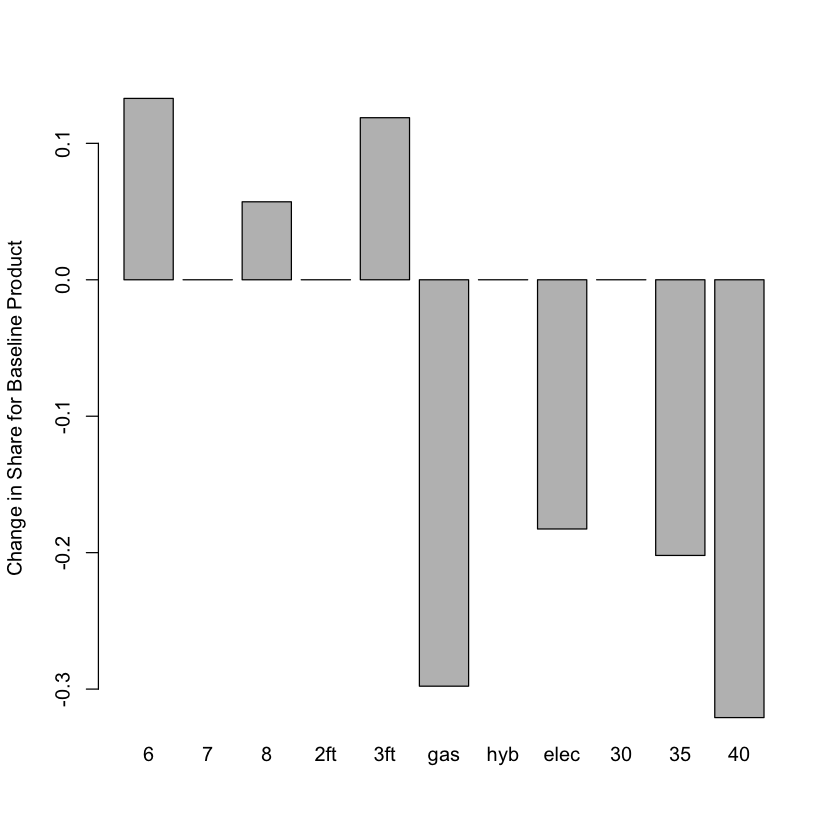

In [45]:
barplot(tradeoff$increase, horiz=FALSE, names.arg=tradeoff$level,
        ylab="Change in Share for Baseline Product")

## 13.3.4 Share Predictions for Identical Alternatives

Occasionally, you may want to predict shares for two designs that are identical in terms of the attributes that you’ve included in your conjoint study. 

In [46]:
new.data.2 <- expand.grid(attrib)[c(8, 8, 1, 3, 41, 49, 26), ]
predict.mnl(m1, new.data.2)

share seat cargo  eng price
8   0.30864694    7   2ft  hyb    30
8.1 0.30864694    7   2ft  hyb    30
1   0.11405912    6   2ft  gas    30
3   0.08400502    8   2ft  gas    30
41  0.01916403    7   3ft  gas    40
49  0.04169352    6   2ft elec    40
26  0.12378444    7   2ft  hyb    35

However, these share predictions may be considered unrealistic.

#### independence of irrelevant alternatives (IIA property)
* While this is confusing, multinomial logit models make predictions in this way. Much has been written about this property of the multinomial logit model and there are many arguments about whether it is desirable. 
* In fact, the property has been given a name: the independence of irrelevant alternatives or IIA property. * It is also sometimes called the “red bus/blue bus problem” based on a classic example that involves predicting share for two different color buses that have otherwise identical features. 
* Predictions from the multinomial logit model for two identical alternatives or even two nearly identical alternatives will exhibit this property.

#### More sophisticated hierarchical models, 
* which we discuss in Sect. 13.5, relax this property somewhat, although they still may make predictions for similar or identical alternatives that seem unreasonable
* There are a number of proposed meth- ods to estimate choice models that do not have the IIA property including nested logit, generalized logit, and multinomial probit.

## 13.3.5 Planning the Sample Size for a Conjoint Study

A crucial issue in planning a successful conjoint analysis study is to decide how many respondents should complete the survey.

To see how sample size affects the model estimates and share predictions, let’s estimate a model using just the data from the first 25 respondents.
* We do this by creating small.conjoint, which is an mlogit.data object with just the first 25 × 15 × 3 = 1125 rows of our original cbc.df data, corresponding to the survey responses for the first 25 respondents.

In [47]:
small.cbc <- mlogit.data(data=cbc.df[1:(25*15*3),],
                         choice="choice", shape="long",
                         varying=3:6, alt.levels=paste("pos", 1:3),
                         id.var="resp.id")
m4 <- mlogit(choice ~ 0 + seat + cargo + eng + price, data = small.cbc)

In [48]:
summary(m4)


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + price, data = small.cbc, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.31467 0.35467 0.33067 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 1.39E-05 
successive function values within tolerance limits 

Coefficients :
         Estimate Std. Error t-value  Pr(>|t|)    
seat7    -0.74326    0.17767 -4.1833 2.873e-05 ***
seat8    -0.15180    0.16859 -0.9004  0.367914    
cargo3ft  0.45613    0.14459  3.1546  0.001607 ** 
enggas    1.62677    0.19764  8.2311 2.220e-16 ***
enghyb    1.03003    0.19179  5.3707 7.844e-08 ***
price35  -0.81508    0.17304 -4.7105 2.471e-06 ***
price40  -1.71390    0.20304 -8.4410 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -319.79

* If we take a look at the coefficient estimates for m4 and compare them to the coeffi- cient estimates for m1 (above), we can see that the estimated coefficients for m4 are similar, but the standard errors for the coefficients are more than three times as big, reflecting the fact that with less data, our estimates of the model coefficients are less precise.

#### We can also compare predictions between m1 and m4:

In [49]:
cbind(predict.mnl(m4, new.data), predict.mnl(m1, new.data))

share seat cargo  eng price      share seat cargo  eng price
8  0.40395622    7   2ft  hyb    30 0.44643895    7   2ft  hyb    30
1  0.16696607    6   2ft  gas    30 0.16497955    6   2ft  gas    30
3  0.14345069    8   2ft  gas    30 0.12150814    8   2ft  gas    30
41 0.02257338    7   3ft  gas    40 0.02771959    7   3ft  gas    40
49 0.08426145    6   2ft elec    40 0.06030713    6   2ft elec    40
26 0.17879218    7   2ft  hyb    35 0.17904663    7   2ft  hyb    35

# 13.4 Adding Consumer Heterogeneity to Choice Models

* 13.4.1 Estimating Mixed Logit Models with mlogit()
* 13.4.2 Share Prediction for Heterogeneous Choice Models   

## 13.4.1 Estimating Mixed Logit Models with mlogit()

In [49]:
m1.rpar <- rep("n", length=length(m1$coef))
names(m1.rpar) <- names(m1$coef)
m1.rpar

seat7    seat8 cargo3ft   enggas   enghyb  price35  price40 
     "n"      "n"      "n"      "n"      "n"      "n"      "n"

In [50]:
m1.hier <- mlogit(choice ~ 0 + seat + eng + cargo + price,
                  data = cbc.mlogit,
                  panel=TRUE, rpar = m1.rpar, correlation = FALSE)

In [51]:
summary(m1.hier)


Call:
mlogit(formula = choice ~ 0 + seat + eng + cargo + price, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = FALSE, panel = TRUE)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

bfgs method
22 iterations, 0h:0m:14s 
g'(-H)^-1g = 2.1E-07 
gradient close to zero 

Coefficients :
             Estimate Std. Error  t-value  Pr(>|t|)    
seat7       -0.600697   0.070101  -8.5691 < 2.2e-16 ***
seat8       -0.384300   0.069424  -5.5356 3.102e-08 ***
enggas       1.752235   0.079676  21.9919 < 2.2e-16 ***
enghyb       0.805668   0.072161  11.1648 < 2.2e-16 ***
cargo3ft     0.565593   0.059620   9.4867 < 2.2e-16 ***
price35     -1.087194   0.071459 -15.2143 < 2.2e-16 ***
price40     -2.000396   0.088539 -22.5933 < 2.2e-16 ***
sd.seat7     0.652917   0.096309   6.7794 1.207e-11 ***
sd.seat8     0.911873   0.087955  10.3676 < 2.2e-16 ***
sd.enggas    0.536984   0.104587   5.1343 2.831e-07 ***
sd.enghyb   -0.237275   0.125759  -1.8867 0.0591945 .  
sd.carg

In [52]:
m2.hier <- update(m1.hier, correlation = TRUE)
summary(m2.hier)


Call:
mlogit(formula = choice ~ 0 + seat + eng + cargo + price, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = TRUE, panel = TRUE)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

bfgs method
39 iterations, 0h:0m:34s 
g'(-H)^-1g = 8.35E-08 
gradient close to zero 

Coefficients :
                   Estimate Std. Error  t-value  Pr(>|t|)    
seat7             -0.583368   0.070819  -8.2374 2.220e-16 ***
seat8             -0.356548   0.073703  -4.8376 1.314e-06 ***
enggas             1.836817   0.085848  21.3962 < 2.2e-16 ***
enghyb             0.890331   0.080081  11.1179 < 2.2e-16 ***
cargo3ft           0.568073   0.062672   9.0642 < 2.2e-16 ***
price35           -1.136492   0.074638 -15.2267 < 2.2e-16 ***
price40           -2.087973   0.091504 -22.8185 < 2.2e-16 ***
seat7.seat7        0.620124   0.102666   6.0402 1.539e-09 ***
seat7.seat8        0.698788   0.104064   6.7150 1.881e-11 ***
seat7.cargo3ft     0.920783   0.112715   8.1692 2.220e-16 *

In [53]:
cov2cor(cov.mlogit(m2.hier))

seat7       seat8    cargo3ft      enggas       enghyb
seat7     1.000000000  0.59427757  0.87066715  0.75985246  0.005193981
seat8     0.594277565  1.00000000  0.12434676  0.06406143  0.040034526
cargo3ft  0.870667154  0.12434676  1.00000000  0.92122916 -0.064291181
enggas    0.759852461  0.06406143  0.92122916  1.00000000 -0.394547443
enghyb    0.005193981  0.04003453 -0.06429118 -0.39454744  1.000000000
price35  -0.048163608 -0.16839517  0.03053983 -0.03080671 -0.333677730
price40   0.072648461 -0.02192483  0.11915162  0.23588634 -0.546420370
             price35     price40
seat7    -0.04816361  0.07264846
seat8    -0.16839517 -0.02192483
cargo3ft  0.03053983  0.11915162
enggas   -0.03080671  0.23588634
enghyb   -0.33367773 -0.54642037
price35   1.00000000  0.51302009
price40   0.51302009  1.00000000

## 13.4.2 Share Prediction for Heterogeneous Choice Models

In [55]:
predict.hier.mnl <- function(model, data, nresp=1000) {
    # Function for predicting shares of a hierarchical multinomial logit model
    # model: mlogit object returned by mlogit()
    # data: a data frame containing the set of designs for which you want to
    #       predict shares.  Same format at the data used to estimate model.
    # Note that this code assumes all model parameters are random
    data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
    coef.Sigma <- cov.mlogit(model)
    coef.mu <- m2.hier$coef[1:dim(coef.Sigma)[1]]
    draws <- mvrnorm(n=nresp, coef.mu, coef.Sigma)
    shares <- matrix(NA, nrow=nresp, ncol=nrow(data))
    for (i in 1:nresp) {
        utility <- data.model%*%draws[i,]
        share = exp(utility)/sum(exp(utility))
        shares[i,] <- share
    }
    cbind(colMeans(shares), data)
}

In [56]:
predict.hier.mnl(m2.hier, data=new.data)

colMeans(shares) seat cargo  eng price
8        0.45369314    7   2ft  hyb    30
1        0.18472196    6   2ft  gas    30
3        0.13321905    8   2ft  gas    30
41       0.01794268    7   3ft  gas    40
49       0.05410889    6   2ft elec    40
26       0.15631428    7   2ft  hyb    35

# 13.5 Hierarchical Bayes Choice Models

* 13.5.1 Estimating Hierarchical Bayes Choice Models with ChoiceModelR
* 13.5.2 Share Prediction for Hierarchical Bayes Choice Models

## 13.5.1 Estimating Hierarchical Bayes Choice Models with ChoiceModelR

In [57]:
choice <- rep(0, nrow(cbc.df))
choice[cbc.df[,"alt"]==1] <- cbc.df[cbc.df[,"choice"]==1,"alt"]
head(choice)

[1] 3 0 0 2 0 0

In [60]:
cbc.coded <- model.matrix(~ seat + eng + cargo + price, data = cbc.df)
cbc.coded <- cbc.coded[, -1] # remove the intercept

In [61]:
choicemodelr.data <- cbind(cbc.df[,1:3], cbc.coded, choice)
head(choicemodelr.data)

resp.id ques alt seat7 seat8 enggas enghyb cargo3ft price35 price40 choice
1       1    1   1     0     0      1      0        0       1       0      3
2       1    1   2     0     1      0      1        1       0       0      0
3       1    1   3     0     0      1      0        1       0       0      0
4       1    2   1     0     0      1      0        0       0       0      2
5       1    2   2     1     0      1      0        1       1       0      0
6       1    2   3     0     0      0      0        0       1       0      0

In [62]:
carpool <- cbc.df$carpool[cbc.df$ques==1 & cbc.df$alt==1]=="yes"
carpool <- as.numeric(carpool)
choicemodelr.demos <- as.matrix(carpool, nrow=length(carpool))
str(choicemodelr.demos)

 num [1:200, 1] 1 0 0 0 1 0 0 1 0 0 ...


In [64]:
# install.packages("ChoiceModelR")
library(ChoiceModelR)

                    Logit Data                    
Attribute       Type         Levels
-----------------------------------
Attribute 1    Linear          1
Attribute 2    Linear          1
Attribute 3    Linear          1
Attribute 4    Linear          1
Attribute 5    Linear          1
Attribute 6    Linear          1
Attribute 7    Linear          1

7 parameters to be estimated.

200 total units.
Average of 3 alternatives in each of 15 sets per unit.
3000 tasks in total.

Table of choice data pooled across units:
Choice  Count   Pct.
--------------------
   1    981    32.7%
   2    1004   33.47%
   3    1015   33.83%

      MCMC Inference for Hierarchical Logit       
Total Iterations:          20000
Draws used in estimation:  10000
Units:                     200
Parameters per unit:       7
Constraints not in effect.
Draws are to be saved.
Prior degrees of freedom:  5
Prior variance:            2

MCMC Iteration Beginning...
Iteration  Acceptance   RLH     Pct. Cert.   Avg. Var.  

Warning message:
: ‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’

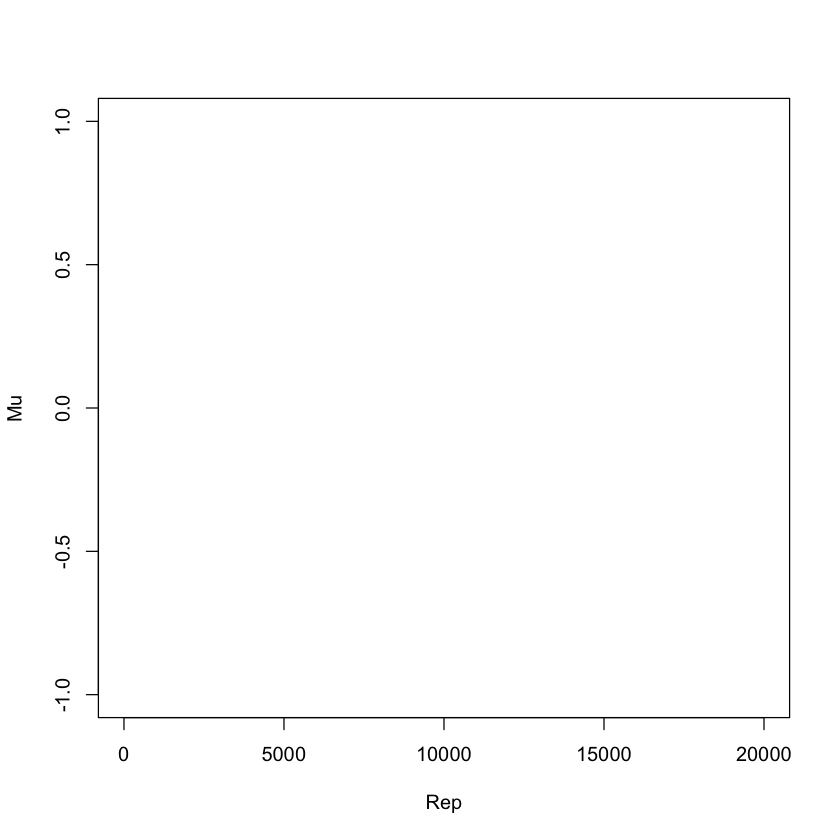

      200  0.301        0.461   0.286        0.64        1.10    1:36  
      300  0.300        0.489   0.345        0.88        1.50    1:27  
      400  0.302        0.502   0.370        1.10        1.74    1:23  
      500  0.310        0.506   0.379        1.17        1.82    1:21  
      600  0.303        0.508   0.383        1.17        1.82    1:18  
      700  0.309        0.505   0.379        1.14        1.81    1:16  
      800  0.298        0.507   0.381        1.20        1.82    1:14  
      900  0.303        0.510   0.387        1.19        1.86    1:14  
     1000  0.300        0.507   0.382        1.14        1.85    1:12  
     1100  0.307        0.505   0.378        1.11        1.82    1:11  
     1200  0.308        0.505   0.379        1.13        1.80    1:10  
     1300  0.304        0.509   0.385        1.19        1.82    1:09  
     1400  0.309        0.508   0.384        1.17        1.80    1:08  
     1500  0.311        0.510   0.387        1.17        1.82   

Warning message:
: ‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’

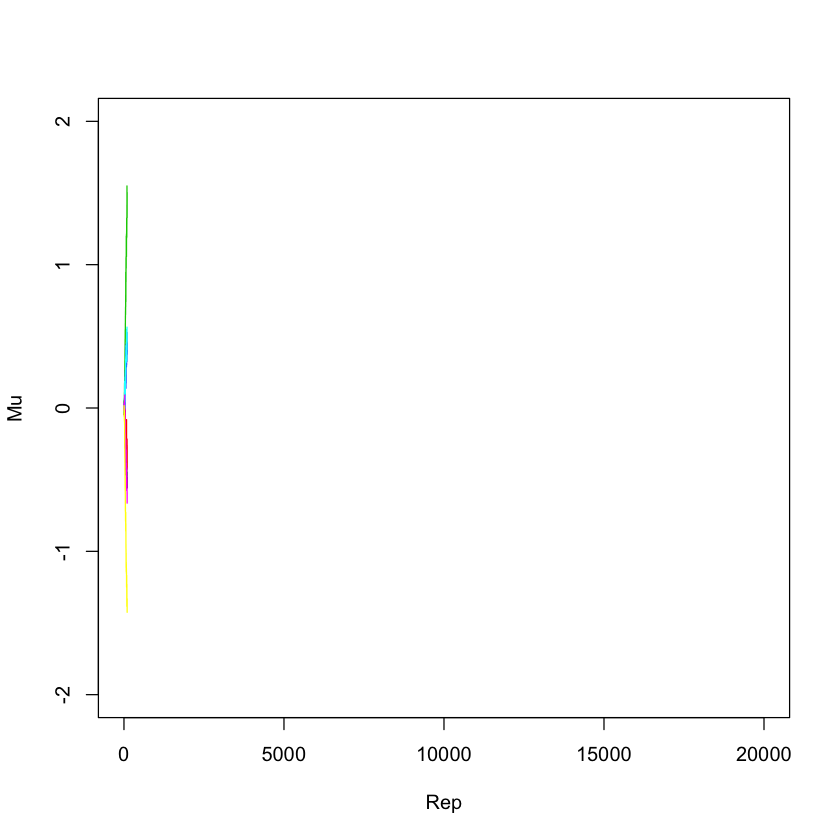

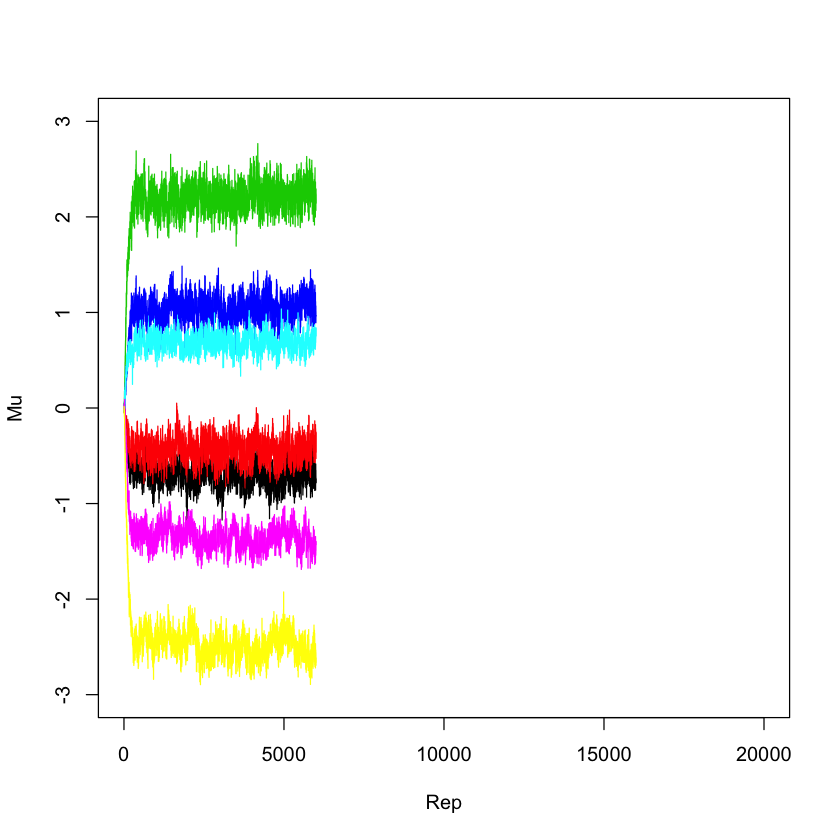

     6100  0.308        0.510   0.388        1.24        1.90    0:49  
     6200  0.305        0.510   0.386        1.23        1.85    0:48  
     6300  0.302        0.509   0.386        1.23        1.85    0:48  
     6400  0.313        0.506   0.381        1.21        1.86    0:48  
     6500  0.305        0.508   0.383        1.16        1.85    0:47  
     6600  0.311        0.509   0.385        1.18        1.84    0:47  
     6700  0.309        0.511   0.388        1.18        1.85    0:47  
     6800  0.302        0.508   0.383        1.14        1.83    0:46  
     6900  0.308        0.508   0.384        1.19        1.89    0:46  
     7000  0.309        0.510   0.387        1.16        1.86    0:46  
     7100  0.304        0.508   0.383        1.17        1.83    0:46  
     7200  0.308        0.509   0.386        1.29        1.91    0:45  
     7300  0.305        0.512   0.390        1.29        1.89    0:45  
     7400  0.304        0.510   0.387        1.25        1.89   

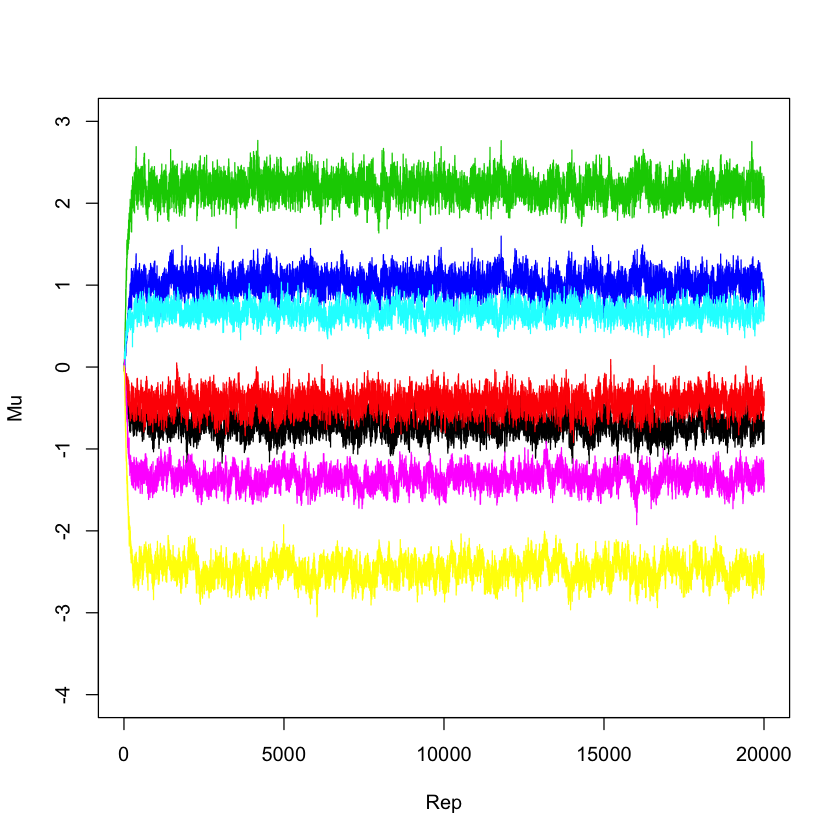

In [65]:
hb.post <- choicemodelr(data=choicemodelr.data, xcoding=rep(1, 7),
                            demos=choicemodelr.demos,
                            mcmc=list(R=20000, use=10000),
                            options=list(save=TRUE))

<img src="figures/cap13.3.png" width=600 />

In [66]:
names(hb.post)

[1] "betadraw"  "deltadraw" "compdraw"  "loglike"

In [67]:
hb.post$compdraw[[567]]$mu

[1] -0.6062266 -0.4617015  2.1321807  1.1853511  0.5813157 -1.0759865 -2.5183413

In [68]:
hb.post$deltadraw[567,]

[1]  1.57389139  1.62839553  0.29864315  0.09501876 -0.01031468 -0.14076715
[7] -0.34549072

In [69]:
hb.post$compdraw[[567]]$rooti

[,1]       [,2]        [,3]         [,4]       [,5]         [,6]
[1,] 0.9045433 -0.2128646 -0.04710085 -0.070466865  0.2338563 -0.142169802
[2,] 0.0000000  0.8754004  0.14139672  0.003165622  0.1022291 -0.262633464
[3,] 0.0000000  0.0000000  0.80037461 -0.888348885 -0.1621882 -0.152986867
[4,] 0.0000000  0.0000000  0.00000000  1.144520511  0.2650395  0.064519306
[5,] 0.0000000  0.0000000  0.00000000  0.000000000  1.1161869 -0.003486716
[6,] 0.0000000  0.0000000  0.00000000  0.000000000  0.0000000  1.324225159
[7,] 0.0000000  0.0000000  0.00000000  0.000000000  0.0000000  0.000000000
             [,7]
[1,] -0.078580141
[2,] -0.006908157
[3,] -0.032582399
[4,] -0.040486823
[5,]  0.160451446
[6,] -0.337415408
[7,]  1.152626366

In [70]:
crossprod(hb.post$compdraw[[567]]$rooti)

[,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  0.81819866 -0.19254527 -0.04260476 -0.06374033  0.21153316 -0.12859875
[2,] -0.19254527  0.81163719  0.13380485  0.01777109  0.03971169 -0.19964652
[3,] -0.04260476  0.13380485  0.66281104 -0.70724524 -0.12637128 -0.15288600
[4,] -0.06374033  0.01777109 -0.70724524  2.10406654  0.43126739  0.21893624
[5,]  0.21153316  0.03971169 -0.12637128  0.43126739  1.40756363 -0.02207509
[6,] -0.12859875 -0.19964652 -0.15288600  0.21893624 -0.02207509  1.87034074
[7,] -0.07107914  0.01067953 -0.02335372 -0.01187803  0.15456499 -0.43201489
            [,7]
[1,] -0.07107914
[2,]  0.01067953
[3,] -0.02335372
[4,] -0.01187803
[5,]  0.15456499
[6,] -0.43201489
[7,]  1.47706472

In [71]:
head(hb.post$betadraw[,,567])

[,1]       [,2]     [,3]      [,4]        [,5]       [,6]      [,7]
[1,]  1.5510826  0.0416114 2.444770 2.4984129  1.35441662 -0.8626406 -2.619638
[2,] -1.2406587  0.3742946 1.076199 0.7027532  0.06704296 -2.8309861 -2.395720
[3,] -3.0299202 -2.6651449 1.810094 0.7901367  0.18377502 -2.4552525 -3.375509
[4,] -0.3973462 -0.3673226 2.557959 2.3164501  0.65870309 -1.9611104 -1.975122
[5,]  1.4126005  0.1608840 2.668743 1.6581943 -0.13657482 -1.7159626 -2.365746
[6,] -1.5385681 -0.5314301 2.612886 0.7390989  1.37775835 -0.3757187 -2.175263

In [72]:
str(hb.post$betadraw)

 num [1:200, 1:7, 1:1000] 1.095 -0.773 -2.323 -0.786 1.868 ...


In [73]:
beta.post.mean <- apply(hb.post$betadraw, 1:2, mean)
head(beta.post.mean)

[,1]         [,2]     [,3]      [,4]       [,5]       [,6]      [,7]
[1,]  0.6673137  0.308337794 1.393498 1.0700737 1.13352109 -0.4596062 -2.388250
[2,] -2.1409175  0.673750707 1.850176 0.7468379 0.98697299 -1.4375499 -2.215944
[3,] -1.9335305 -2.096306663 1.273514 0.3754271 0.47963691 -1.4632681 -2.262642
[4,] -0.7038011 -0.009122167 3.458789 2.6988048 0.02083848 -1.3361158 -2.079023
[5,]  0.9177891  0.981852197 2.692057 1.7655292 0.53060049 -2.1931222 -2.960860
[6,] -1.3481441 -0.145236117 3.598179 1.7665303 1.45613597 -0.6505660 -2.387901

In [74]:
beta.post.q05 <- apply(hb.post$betadraw, 1:2, quantile, probs=c(0.05))
beta.post.q95 <- apply(hb.post$betadraw, 1:2, quantile, probs=c(0.95))
rbind(q05=beta.post.q05[1,], mean=beta.post.mean[1,], q95=beta.post.q95[1,])                  

[,1]       [,2]        [,3]       [,4]       [,5]       [,6]
q05  -0.4144134 -1.0783238 -0.09118704 -0.3181664 0.02792458 -1.5309235
mean  0.6673137  0.3083378  1.39349755  1.0700737 1.13352109 -0.4596062
q95   1.8367892  1.6436904  2.88100923  2.4371864 2.31199442  0.6156176
          [,7]
q05  -3.697075
mean -2.388250
q95  -1.160673

## 13.5.2 Share Prediction for Hierarchical Bayes Choice Models

In [76]:
predict.hb.mnl <- function(betadraws, data) {
    # Function for predicting shares from a hierarchical multinomial logit
model
    # betadraws: matrix of betadraws returned by ChoiceModelIR
    # data: a data frame containing the set of designs for which you want to
    #       predict shares.  Same format at the data used to estimate model.
    data.model <- model.matrix(~ seat + eng + cargo + price, data = data)
    data.model <- data.model[,-1] # remove the intercept
    nresp <- dim(betadraws)[1]
    ndraws <- dim(hb.post$betadraw)[3]
    shares <- array(dim=c(nresp, nrow(data), ndraws))
    for (d in 1:ndraws) {
        for (i in 1:nresp) {
            utility <- data.model%*%betadraws[i,,d]
            shares[i,,d] = exp(utility)/sum(exp(utility))
        }
    }
    shares.agg <- apply(shares, 2:3, mean)
    cbind(share=apply(shares.agg, 1, mean),
          pct=t(apply(shares.agg, 1, quantile, probs=c(0.05, 0.95))),
          data)
}

<img src="figures/cap13.4.png" width=600 />

# 13.6 Design of Choice-Based Conjoint Surveys

# 13.7 Learning More

# 13.8 Key Points

# 참고자료

* [1] R for Marketing Research and Analytics - http://www.amazon.com/Marketing-Research-Analytics-Use/dp/3319144359
* [2] Choice-Based Conjoint Workshop October, 2010 - http://manoa.hawaii.edu/ctahr/aheed/Update%202010%20Presentations%20by%20Cathy/Conjoint_Choice_introduction-overview.ppt
* [3] Introduction to Choice-Based Conjoint (CBC) - http://www.sawtoothsoftware.com/download/techpap/curriculum3_4.ppt 
* [4] Conjoint analysis - http://www.slideshare.net/SunnyBose/conjoint-analysis-12090511
* [5] A History of Conjoint - https://faculty.fuqua.duke.edu/~jch8/bio/Papers/A%20History%20of%20Conjoint.ppt
* [6] Applied Conjoint Analysis - http://academic.csuohio.edu/kneuendorf/c53108/conjoint08.ppt
* [7] (Advanced MMBR's) Conjoint analysis - http://www.chrissnijders.com/ammbr/AMMBR1213_week4_conjoint_analysis.pptx 
* [8] Multi-Choice Models - https://www3.nd.edu/~wevans1/ecoe60303/Multi-Choice.ppt
* [9] Discrete Choice Modeling - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/Part9-MultinomialLogit.ppt 
* [10] Logit Models - https://www.empiwifo.uni-freiburg.de/lehre-teaching-1/summer-term-08/materials-microeconometrics/mlogit 
* [11] Discrete Choice Modeling : 2. Binary Choice -  http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart2-BinaryChoice.pptx
* Discrete Choice Modeling : 3. Binary ChoiceInference -  http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart3-BinaryChoiceInference.pptx
* Discrete Choice Modeling : 4. Extended BinaryChoice -  http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart4-ExtendedBinaryChoice.pptx
* Discrete Choice Modeling : 5. Panel Data Binary Choice Models - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart5-PanelDataBinaryChoiceModels.pptx
* Discrete Choice Modeling : 6. Heterogeneity - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart6-Heterogeneity.pptx
* Discrete Choice Modeling : 7. Ordered Choice - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart7-OrderedChoice.pptx
* Discrete Choice Modeling : 8. Count Data - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart8-CountData.pptx
* Discrete Choice Modeling : 9. Multinomial Choice - http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Lectures/GTPart9-MultinomialChoice.pptx
* Logit/Probit Models - https://www3.nd.edu/~wevans1/ecoe60303/logit_probit.ppt
* Logit/Probit - http://www.columbia.edu/~so33/SusDev/Lecture_9.pdf